# Case Study On Urban Population Dynamics

Many of your Urban Informatics projects will deal with urban population. Let's take a closer look on how it can be defined and how is it distributed in space. 

Specifically lets focus on the following question:

### Is the residential population distribution representative for urban dynamics in bulk? 
### Specifically is the daytime working population distribution substantially different?

Along the way recall working with Pandas dataframes and learn a way to visualize maps and spatial distributions in Python using geopandas

In [1]:
#import useful packages
import pandas as pd #Pandas for dataframes
import geopandas as gpd #geopandas
import numpy as np #Numpy for numeric arrays and vector maths
import math #for mathematical operations like logarithm
import matplotlib.pylab as plt
#make sure python plots are embedded in the notebook
%matplotlib inline 

In [2]:
#upload a dataframe for residential location and demographic decomposition of urban population acording to LEHD
LEHDR=pd.read_csv("SMdata/LEHD-resident.csv",index_col=0)

In [3]:
#upload a dataframe for work location and demographic decomposition of urban population acording to LEHD
LEHDW=pd.read_csv("SMdata/LEHD-work.csv",index_col=0)

In [4]:
#take a glimpse in the data
LEHDR.head()

,total,male,female,age_under_29,age_30_54,age_55_over,white,black,asian,others,two_or_more,less_high_school,high_school,college,bachelor
tz,,,,,,,,,,,,,,,
2,198,108,90,67,70,61,104,45,29,8,12,24,31,38,38
3,11398,5393,6005,2551,6346,2501,5990,4106,973,120,209,1414,2035,2666,2732
4,12318,6125,6193,3731,6421,2166,8259,2063,1591,122,283,1375,1859,2392,2961
5,10751,5546,5205,2154,6057,2540,9513,464,656,36,82,792,1626,2466,3713
6,6729,3287,3442,1409,3692,1628,5093,677,818,53,88,582,1052,1538,2148


Data provides the total count as well as demographic decomposition of residential populaton per NYC taxi zone (not a 'native' unit for US Census, we use this aggregation for compatibility with further analysis of urban mobility data)

In [5]:
#Look at the data stats
LEHDR.describe()
#We have a total of 261 taxi zones with data, average of 13672.6 residents per zone, the smallest has only 40 residents and the largest - 48629 residents

,total,male,female,age_under_29,age_30_54,age_55_over,white,black,asian,others,two_or_more,less_high_school,high_school,college,bachelor
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,13672.601533,6609.865900,7062.735632,3154.651341,7643.739464,2874.210728,8394.957854,3295.226054,1597.501916,128.325670,256.590038,1568.632184,2247.517241,2988.498084,3713.302682
std,9680.577392,4628.773452,5093.221366,2366.329312,5420.540564,2085.523846,6190.873828,4437.941903,1859.520212,111.811127,200.034008,1281.468218,1676.119109,2161.019226,2661.564273
min,40.000000,16.000000,24.000000,9.000000,16.000000,15.000000,26.000000,6.000000,5.000000,0.000000,1.000000,4.000000,6.000000,13.000000,8.000000
25%,7847.000000,3691.000000,3944.000000,1596.000000,4301.000000,1346.000000,3884.000000,566.000000,479.000000,47.000000,108.000000,601.000000,1121.000000,1620.000000,1877.000000
50%,12091.000000,5887.000000,6332.000000,2793.000000,6925.000000,2585.000000,7648.000000,1522.000000,1053.000000,102.000000,223.000000,1347.000000,1934.000000,2645.000000,3419.000000
75%,18811.000000,8920.000000,9788.000000,4229.000000,10608.000000,3909.000000,11525.000000,4184.000000,1895.000000,179.000000,349.000000,2246.000000,2979.000000,4141.000000,5069.000000
max,48629.000000,21874.000000,26755.000000,13105.000000,26650.000000,11111.000000,32818.000000,24998.000000,11989.000000,730.000000,1163.000000,6105.000000,8819.000000,11312.000000,15810.000000


In [6]:
#take a glimpse in the population distribution by work location
LEHDW.head()

,total,male,female,age_under_29,age_30_54,age_55_over,white,black,asian,others,two_or_more,less_high_school,high_school,college,bachelor
tz,,,,,,,,,,,,,,,
3,4989,1863,3126,892,2774,1323,2513,1968,386,39,83,637,941,1287,1232
4,2717,1310,1407,688,1506,523,1884,512,251,24,46,350,434,599,646
5,1191,658,533,319,631,241,960,139,87,0,5,96,181,257,338
6,2495,1070,1425,491,1315,689,1907,330,206,20,32,167,453,540,844
7,17223,8980,8243,4006,9611,3606,12137,2789,1910,143,244,2238,3083,3795,4101


In [7]:
#Look at the data stats
LEHDW.describe()
#overall impression - distribution is more narrow

,total,male,female,age_under_29,age_30_54,age_55_over,white,black,asian,others,two_or_more,less_high_school,high_school,college,bachelor
count,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000
mean,16186.665370,8067.136187,8119.529183,3530.342412,9227.630350,3428.692607,10431.225681,3471.256809,1859.914397,136.482490,287.785992,1696.723735,2552.630350,3534.727626,4872.241245
std,25772.339555,13537.685598,12459.126010,5846.890848,15176.841009,4970.647290,17687.293821,4787.477917,3234.556316,205.964634,477.092747,2115.325209,3514.101766,5267.232367,9452.361730
min,5.000000,4.000000,1.000000,0.000000,3.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
25%,4084.000000,1978.000000,2133.000000,847.000000,2339.000000,996.000000,2513.000000,970.000000,355.000000,33.000000,67.000000,511.000000,734.000000,993.000000,1050.000000
50%,8263.000000,3996.000000,4302.000000,1692.000000,4610.000000,1908.000000,5171.000000,2120.000000,763.000000,70.000000,137.000000,1010.000000,1468.000000,1978.000000,2052.000000
75%,16136.000000,7800.000000,8243.000000,3494.000000,8879.000000,3678.000000,10435.000000,3908.000000,1856.000000,142.000000,275.000000,1983.000000,2810.000000,3708.000000,4189.000000
max,197140.000000,107473.000000,91392.000000,44077.000000,117884.000000,39189.000000,142519.000000,44468.000000,25756.000000,1446.000000,3477.000000,14126.000000,25250.000000,41191.000000,79399.000000


In [8]:
#merge the two dataframes keeping only totals: perform inner merge on index
#as column names are largely repeated, introduce a suffix for the ones from the second dataframe
Pdata=LEHDR[['total']].merge(LEHDW[['total']], on=None, left_index=True, right_index=True, how='inner', suffixes=('','W'))
#also for the sake of consistency rename the total from LEHDR into totalR
Pdata.rename(columns={'total':'totalR'},inplace=True)

In [9]:
Pdata.head()

,totalR,totalW
tz,,
3,11398,4989
4,12318,2717
5,10751,1191
6,6729,2495
7,43048,17223


Perhaps a first idea for exploratory analysis is to compare spatial distribution of residentail against working population

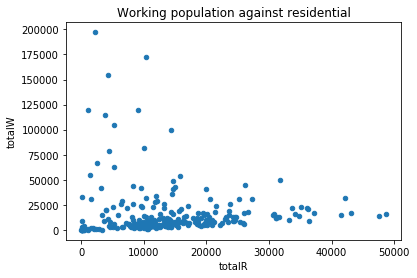

In [10]:
#an easiest way to do so is a scatter plot
#Pandas have plotting functionality embedded (leveraging Matplotlib)
Pdata.plot(x='totalR',y='totalW',kind='scatter',title='Working population against residential')


No obvious pattern. Let's also try log-scale visualization

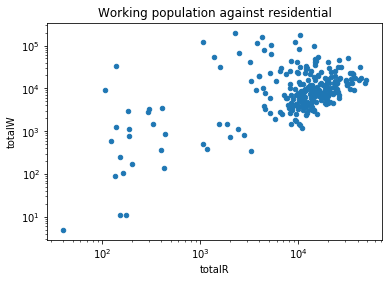

In [11]:
Pdata.plot(x='totalR',y='totalW',kind='scatter',title='Working population against residential',logx=True,logy=True)


Now, while we can see a clear nearly linear increasing bottom-line trend, it's hard to claim an overall correlation. Let's look at the correlation value



#### Correlation

Recall the concept of Pearson correlation coefficient. Given two random variables $X,Y$ with observations $X_1,X_2,...,X_n$, $Y_1,Y_2,...,Y_n$ it is defined as
$$
C=\frac{E[(X-E[X])(Y-E[Y])]}{\sigma(X)\sigma(Y)},
$$
where $E[X]=\sum_i X_i/n$ is the mean, $\sigma(X)=\sqrt{E[(X-E[X])^2]}=\sqrt{\frac{\sum_i(X_i-E[X])^2}{n}}$ is the standard deviation.

Correlaton gets higher when $X$ and $Y$ get above/below average together and gets lower when they appear in a couterphase. One can see that $-1\leq C\leq 1$, where $\pm 1$ is reached only is case of a strict linear dependence. Zero correlation is smth you would averagely expect at random.


In [12]:
#correlation matrix between every pair of columns of a given list (including correlations of column with itself with is always 1)
np.corrcoef(Pdata.totalR,Pdata.totalW)

array([[ 1.        , -0.04078555],
       [-0.04078555,  1.        ]])

The correlation turn out to be negative!!! So overall working population is distributed quite differently from residential.

Let's try to visualize it spatially

In [13]:
#just for comparison example here is correlation between male and female residential/working population
print(np.corrcoef(LEHDR.male,LEHDR.female)[1][0],np.corrcoef(LEHDW.male,LEHDW.female)[0][1])

(0.9829566903669411, 0.9655514199256813)


In [14]:
#read shapefiles of NYC taxi zones
tzs=gpd.read_file('taxi_zones/taxi_zones.shp')

In [15]:
#the data structure is pretty much the same as the regular pandas dataframe, but we have a specific column geometry, representing the shape (sequence of points on the border) of each zone
tzs.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.9183527103 192536.0856972019,..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"(POLYGON ((1033269.243591294 172126.0078125, 1..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.769506663 256767.6975403726,..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.4667968601 203714.0759887695,..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.3104932606 144283.335850656, ..."


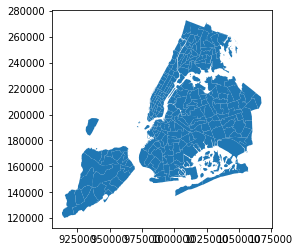

In [16]:
#having geometry allows to plot the taxi zones map easily
tzs.plot()##图像比较小

/Users/cindy/anaconda2/lib/python2.7/site-packages/geopandas/plotting.py:389: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  "(for consistency with pandas)", FutureWarning)


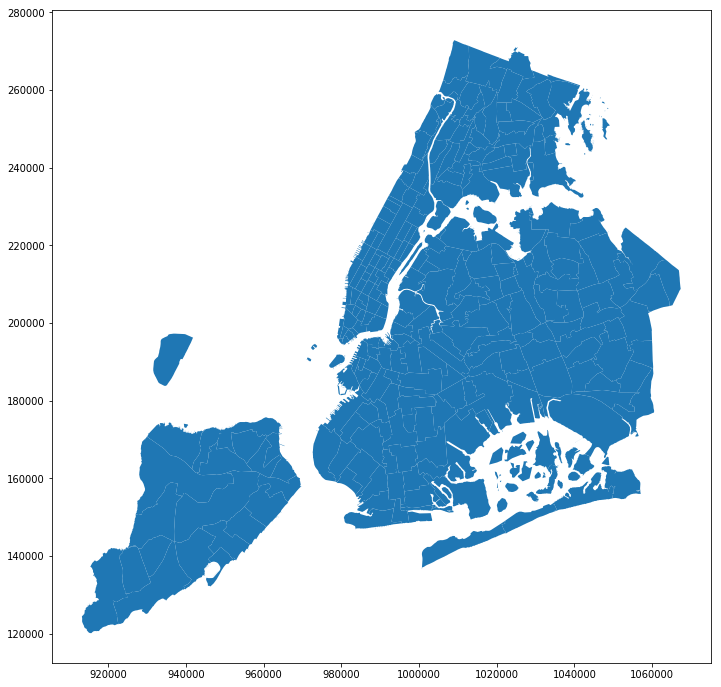

In [17]:
#but one might better adjust the plot scale
f, ax = plt.subplots(1, figsize=(12, 12))
tzs.plot(axes=ax)

now use those shapes of taxi zones to visualize the spatial distribution of urban population
用dictionary的方法link 两个表格，也可以merge

In [18]:
#add the residential and working population columns to the geopandas dataframe
#first create mappings (dictionaries) of taxi zones to their residential and working population
Residential={tz:Pdata.totalR[tz] for tz in Pdata.index} #mapping (dictionary) of taxi zones to their residential population; we use dictionary comprehension here
Working={tz:Pdata.totalW[tz] for tz in Pdata.index} #mapping (dictionary) of taxi zones to their working population

In [19]:
#glimpse inside the dictionary
dict(Residential.items()[0:5])

{3: 11398, 4: 12318, 5: 10751, 6: 6729, 7: 43048}

In [20]:
dict(Working.items()[0:5])

{3: 4989, 4: 2717, 5: 1191, 6: 2495, 7: 17223}

In [21]:
#and add new columns by mapping LocationID to the residential and working population using the dictionaries above
tzs['ResidentialPop']=tzs.LocationID.map(Residential)
tzs['WorkingPop']=tzs.LocationID.map(Working)

In [22]:
tzs.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,ResidentialPop,WorkingPop
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.9183527103 192536.0856972019,...",NaN,NaN
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"(POLYGON ((1033269.243591294 172126.0078125, 1...",NaN,NaN
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.769506663 256767.6975403726,...",11398.0,4989.0
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.4667968601 203714.0759887695,...",12318.0,2717.0
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.3104932606 144283.335850656, ...",10751.0,1191.0


In [23]:
tzs.dropna(inplace=True)### Drop 掉 Na的行 row ,inplace ???

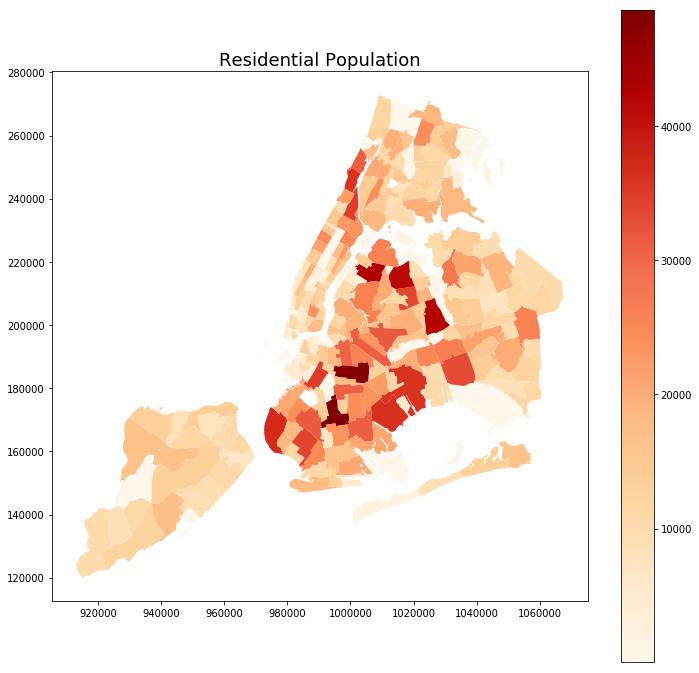

In [24]:
#now color the taxi zones based on the value of ResidentialPop### normalize by the land area , small area lives less ppl 
f, ax = plt.subplots(1, figsize=(12, 12))
ax.set_title("Residential Population", fontsize=18)
tzs.plot(axes=ax, column='ResidentialPop', legend = True, cmap='OrRd')

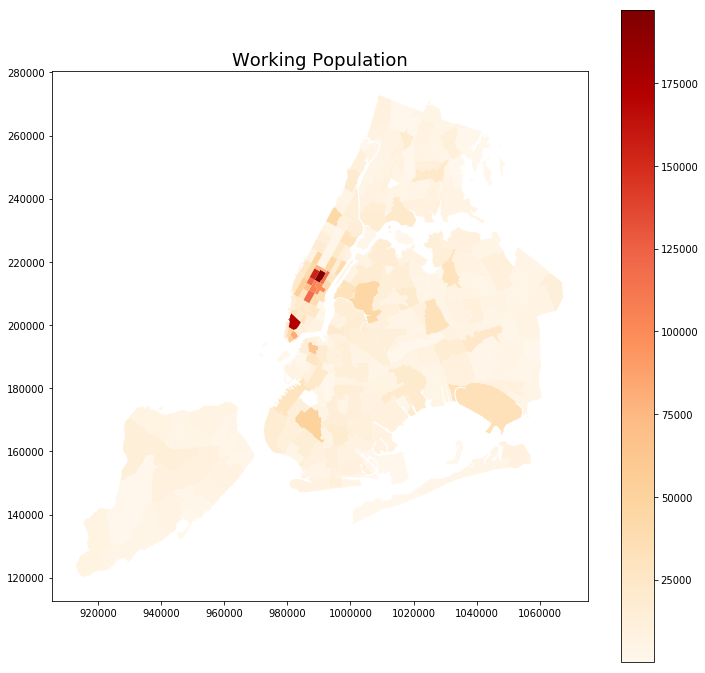

In [25]:
#now color the taxi zones based on the value of ResidentialPop
f, ax = plt.subplots(1, figsize=(12, 12))
ax.set_title("Working Population", fontsize=18)
tzs.plot(axes=ax, column='WorkingPop', legend = True, cmap='OrRd')

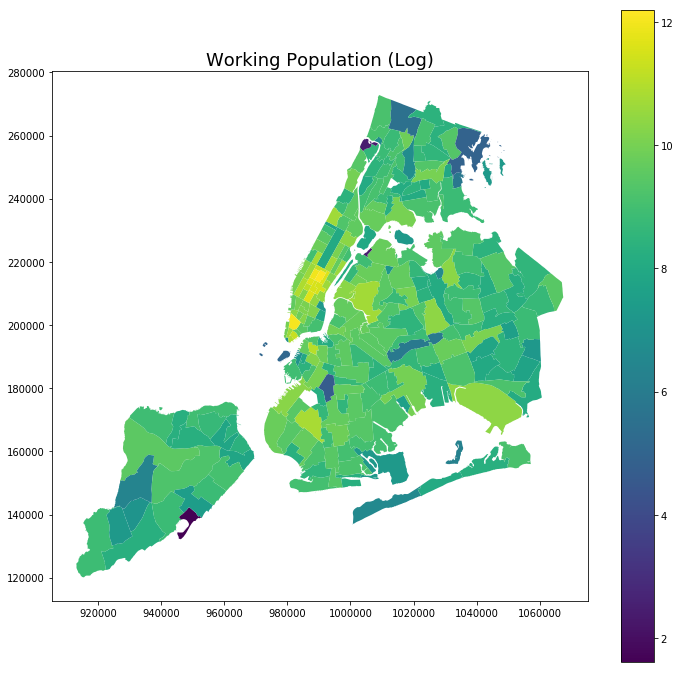

In [26]:
#as values vary widely try log-scale  ,使用了log，防止以上情况的发生‘
tzs['LogWorkingPop']=np.log(tzs.WorkingPop)
f, ax = plt.subplots(1, figsize=(12, 12))
ax.set_title("Working Population (Log)", fontsize=18)
tzs.plot(axes=ax, column='LogWorkingPop', legend = True)

## Task 1. Visualize imbalance (log-ratio) between working and residential population

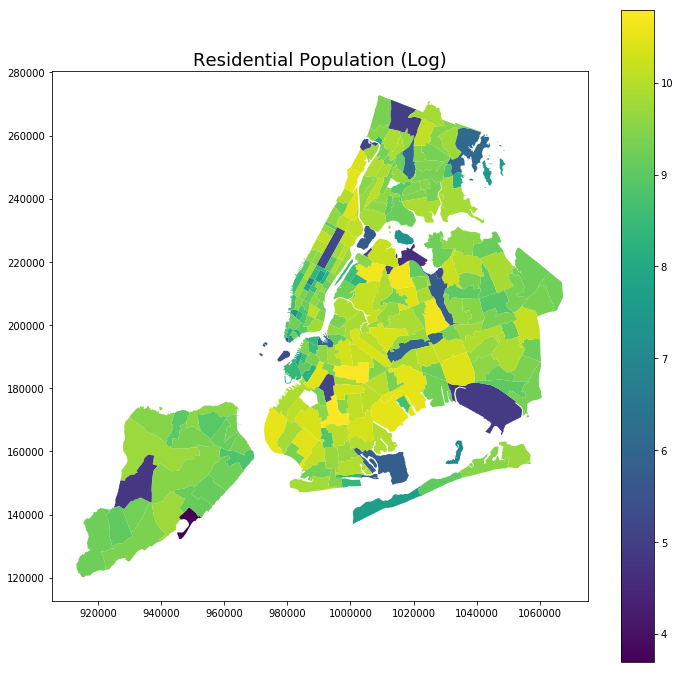

In [27]:
tzs['LogResidentialPop']=np.log(tzs.ResidentialPop)
f, ax = plt.subplots(1, figsize=(12, 12))
ax.set_title("Residential Population (Log)", fontsize=18)
tzs.plot(axes=ax, column='LogResidentialPop', legend = True)

## Task 2. Correct the heatmaps by visualizing working and residential population density 
This will properly account for heterogeniety of taxi zone sizes. Consider log ratio of population and Shape_area

In [28]:
tzs['LogResidentialDensity']=np.log(tzs.ResidentialPop)/tzs.Shape_Area
tzs['LogWorkingDensity']=np.log(tzs.WorkingPop/tzs.Shape_Area)

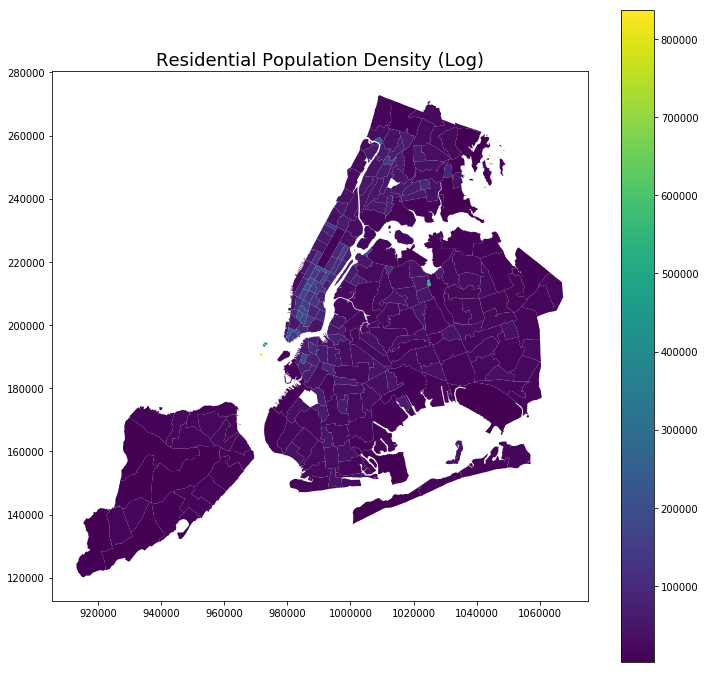

In [29]:
f, ax = plt.subplots(1, figsize=(12, 12))
ax.set_title("Residential Population Density (Log)", fontsize=18)
tzs.plot(axes=ax, column='LogResidentialDensity', legend = True)

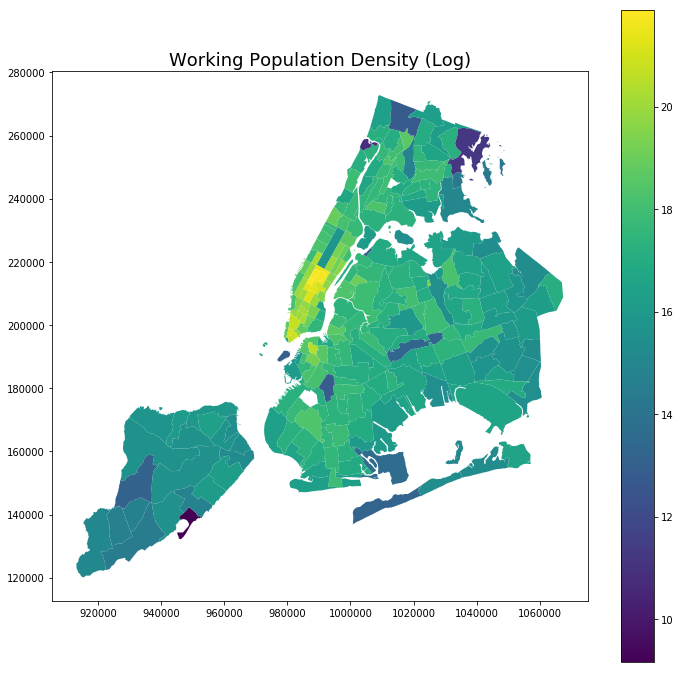

In [30]:
f, ax = plt.subplots(1, figsize=(12, 12))
ax.set_title("Working Population Density (Log)", fontsize=18)
tzs.plot(axes=ax, column='LogWorkingDensity', legend = True)

## Task 3. Visualuze gender workforce imbalance: log-ratio between male/female working population

In [43]:
tzs['genderimbalance']=np.log(LEHDW.female/LEHDW.male)

In [44]:
tzs.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,ResidentialPop,WorkingPop,LogWorkingPop,LogResidentialPop,LogResidentialDensity,LogWorkingDensity,genderimbalance
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.769506663 256767.6975403726,...",11398.0,4989.0,8.514991,9.341193,17.405993,16.579790,NaN
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.4667968601 203714.0759887695,...",12318.0,2717.0,7.907284,9.418817,18.516973,17.005439,0.517566
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.3104932606 144283.335850656, ...",10751.0,1191.0,7.082549,9.282754,16.887750,14.687544,0.071433
5,6,0.150491,0.000606,Arrochar/Fort Wadsworth,6,Staten Island,"POLYGON ((966568.7466657609 158679.854687795, ...",6729.0,2495.0,7.822044,8.814182,16.222052,15.229914,-0.210684
6,7,0.107417,0.000390,Astoria,7,Queens,"POLYGON ((1010804.217962816 218919.6406951398,...",43048.0,17223.0,9.754001,10.670071,18.519979,17.603909,0.286513


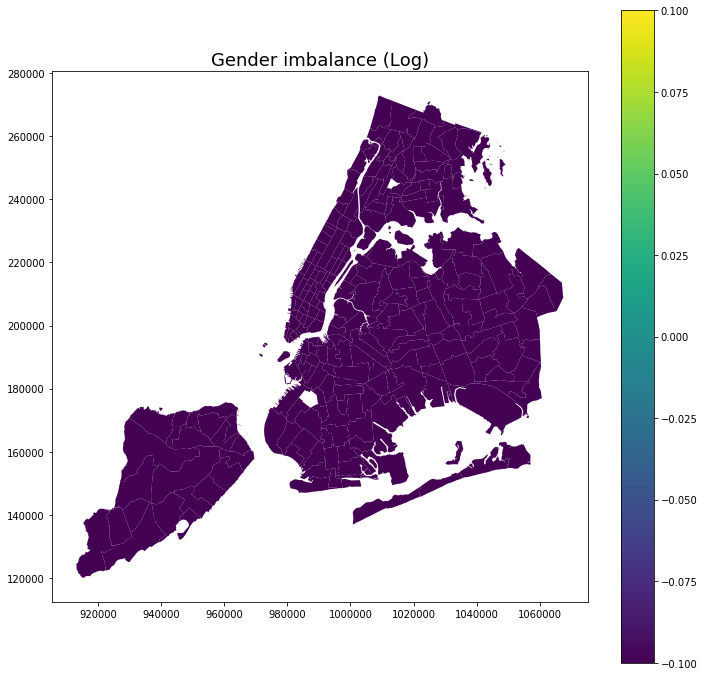

In [45]:
f, ax = plt.subplots(1, figsize=(12, 12))
ax.set_title("Gender imbalance (Log)", fontsize=18)
tzs.plot(axes=ax, column='genderimbalance', legend = True)